In [1]:
import numpy as np

In [3]:
import StringIO

## Q1: ##

Saving a table to text with a header with no preceding "#"

Also, demo StringIO

In [15]:
x = StringIO.StringIO()
arr = np.arange(10)
np.savetxt(x,arr, header='test', comments="")

In [17]:
x.seek(0)
print(x.read())
with open('file.txt','w') as f:
    f.write(x.getvalue())

test
0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00
5.000000000000000000e+00
6.000000000000000000e+00
7.000000000000000000e+00
8.000000000000000000e+00
9.000000000000000000e+00



In [19]:
%%bash
cat file.txt

test
0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00
5.000000000000000000e+00
6.000000000000000000e+00
7.000000000000000000e+00
8.000000000000000000e+00
9.000000000000000000e+00


## astropy convolution ##

How do you convolve fast?

see, e.g., http://keflavich.github.io/blog/fft-comparisons-in-python.html

In [20]:
from astropy.convolution import convolve, convolve_fft

Speed of DFT: $O(n^2)$

Speed of FFT: $O(n log(n))$

In [29]:
import scipy.fftpack, scipy.ndimage, scipy.signal

In [33]:
scipy.ndimage.convolve
scipy.signal.fftconvolve??

In [38]:
%%bash
factor 9216

9216: 2 2 2 2 2 2 2 2 2 2 3 3


faster fftw: `--enable-avx` for "advanced vector instructions".  8x FLOPs at a time!

### What does it mean to "remove" fft modes? ###

In [72]:
x = np.random.randn(64) + 5 + np.sin(np.arange(64))*3

In [73]:
f = np.fft.fft(x)

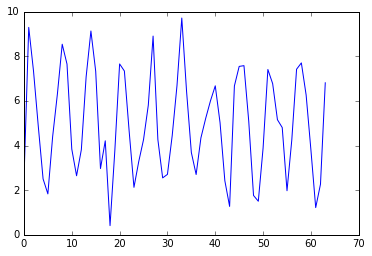

In [74]:
pl.plot(x)

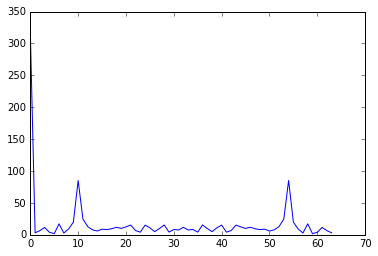

In [75]:
%matplotlib inline
import pylab as pl
pl.plot(np.abs(f))


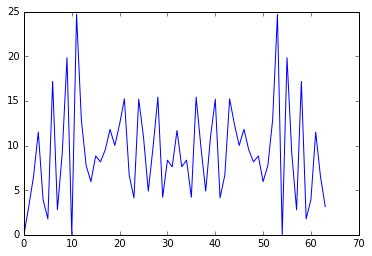

In [76]:
f[0] = 0
f[10] = 0
f[64-10] = 0
pl.plot(np.abs(f))


In [77]:
xi = np.fft.ifft(f)

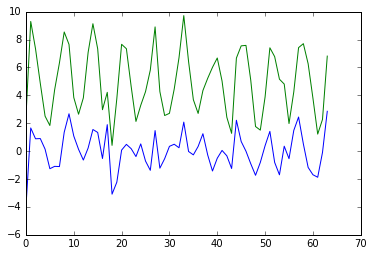

In [78]:
pl.plot(xi.real)
pl.plot(x)

## Q3 ##

Install a module, then keep editing it.

`python setup.py develop`

Use https://github.com/astropy/package-template to get everything set up in a cool way.  `develop` doesn't do much good for C code.

Within an interactive session, use `reload(package)` (python2) or `import importlib; importlib.reload(package)` to reload the package.  This finnicky.

Other option, which works with C extensions: ``python setup.py build_ext --inplace``.  Or you can use ``python setup.py build`` to build into the `build/` directory, which will then be accessible using `import` if you've used `python setup.py develop` 

In [80]:
%%bash
cd ~/repos/astropy
ls
ls build/

CHANGES.rst
CITATION
CONTRIBUTING.md
MANIFEST.in
README.rst
ah_bootstrap.py
appveyor.yml
astropy
astropy.egg-info
astropy_helpers
build
cextern
dist
docs
ez_setup.py
licenses
pip-requirements
setup.cfg
setup.py
static
tox.ini
bdist.macosx-10.5-x86_64
lib.macosx-10.5-x86_64-2.7
lib.macosx-10.5-x86_64-3.5
temp.macosx-10.5-x86_64-2.7
temp.macosx-10.5-x86_64-3.5


## last note ##

Profiling (tracking memory and time use) can be done with the `memory_profile` and `timeit` utilities.  [psrecord](https://github.com/astrofrog/psrecord) is also nice.